# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [37]:
import os

print(os.getcwd())

C:\Users\JaimeGGB\Downloads\Cleaning US Census Data


In [38]:
path = r'C:\Users\JaimeGGB\Downloads\Cleaning US Census Data/*.csv'
all_files = glob.glob(path)

li = []

for filename in all_files:
    try:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    except Exception as e:
        print(f"Failed to read {filename}: {e}")
        
if li:
    frame = pd.concat(li, axis=0, ignore_index=True)
else:
    print("No dataframes to concatenate")

us_census = pd.concat(li, axis=0, ignore_index=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [39]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [40]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [41]:
# remove column 1 
# Turn state to string
# Turn income into float
# seperate genderpop into malepop and femalepop, integer columns
# do scatterplot

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [42]:
us_census['Income'] = us_census['Income'].astype(str)
us_census['Income'] = us_census['Income'].str.replace('$', '')
us_census['Income'] = us_census['Income'].str.replace(',', '').str.strip().astype(float)
us_census.head(32)

C:\Users\JaimeGGB\AppData\Local\Temp/ipykernel_12120/330972497.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] = us_census['Income'].str.replace('$', '')


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F
6,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F
7,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F
8,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F
9,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [43]:
us_census['GenderPop'] = us_census['GenderPop'].astype(str)
us_census[['MalePop']] = us_census['GenderPop'].str.extract('(\d+)M_')
us_census[['FemalePop']] = us_census['GenderPop'].str.extract('(\d+)F$')

us_census


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239
6,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239
7,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615
8,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041
9,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [44]:
us_census[['MalePop','FemalePop']] = us_census[['MalePop','FemalePop']].astype(float)
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
MalePop       float64
FemalePop     float64
dtype: object

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

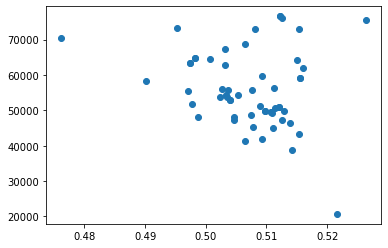

In [45]:
us_census['PropFemale'] = us_census['FemalePop'] / us_census['TotalPop'] 
plt.scatter(us_census['PropFemale'], us_census['Income'])
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [46]:
us_census['FemalePop'] = us_census['FemalePop'].fillna(us_census['TotalPop'] - us_census['MalePop'])
us_census['PropFemale'] = us_census['PropFemale'].fillna(us_census['FemalePop'] / us_census['TotalPop'])

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [47]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

11. Drop those duplicates using the `.drop_duplicates()` function.

In [48]:
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop,PropFemale
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093.0,2489527.0,0.515364
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160.0,349215.0,0.476175
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088.0,3342840.0,0.503294
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913.0,1506295.0,0.509192
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135.0,19334329.0,0.503217
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667.0,2630239.0,0.498255
6,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667.0,2630239.0,0.498255
7,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607.0,1841615.0,0.512525
8,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413.0,478041.0,0.515990
9,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674.0,340810.0,0.526360


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

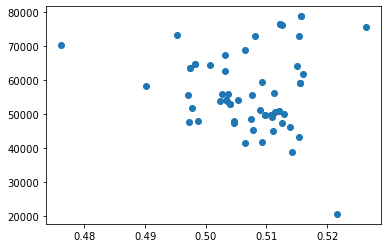

In [49]:
plt.scatter(us_census['PropFemale'], us_census['Income'])
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [50]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop', 'PropFemale'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [51]:
us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].replace('%','',regex=True).astype(float)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop,PropFemale
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,2341093.0,2489527.0,0.515364
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160.0,349215.0,0.476175
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,3299088.0,3342840.0,0.503294
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,1451913.0,1506295.0,0.509192
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,19087135.0,19334329.0,0.503217
5,5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667M_2630239F,2648667.0,2630239.0,0.498255
6,0,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667M_2630239F,2648667.0,2630239.0,0.498255
7,1,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607M_1841615F,1751607.0,1841615.0,0.512525
8,2,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413M_478041F,448413.0,478041.0,0.515990
9,3,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674M_340810F,306674.0,340810.0,0.526360


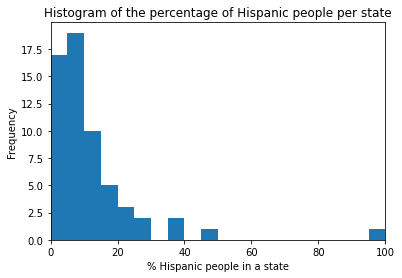

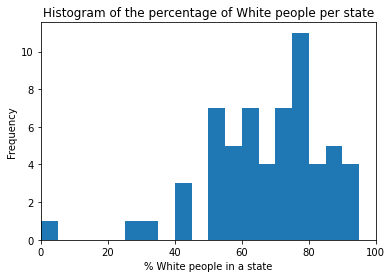

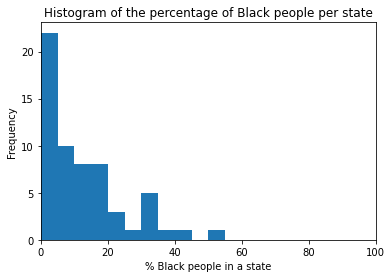

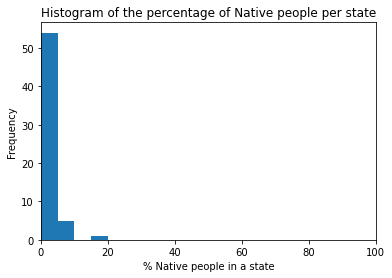

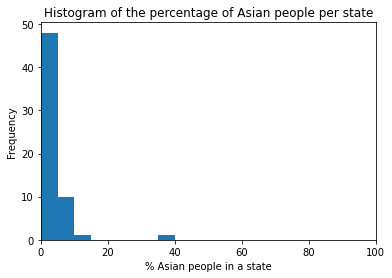

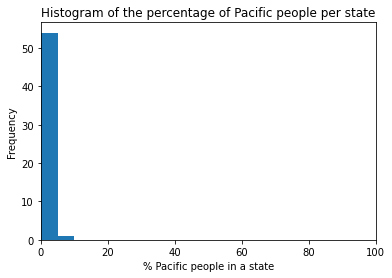

In [54]:
# Histogram of the percentage of Hispanic people per state
plt.hist(us_census['Hispanic'], bins=np.arange(0, 110, 5))
plt.xlabel('% Hispanic people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of Hispanic people per state')
plt.xlim(0, 100)
plt.show()

# Histogram of the percentage of White people per state
plt.hist(us_census['White'], bins=np.arange(0, 110, 5))
plt.xlabel('% White people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of White people per state')
plt.xlim(0, 100)
plt.show()

# Histogram of the percentage of Black people per state
plt.hist(us_census['Black'], bins=np.arange(0, 110, 5))
plt.xlabel('% Black people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of Black people per state')
plt.xlim(0, 100)
plt.show()

# Histogram of the percentage of Native people per state
plt.hist(us_census['Native'], bins=np.arange(0, 110, 5))
plt.xlabel('% Native people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of Native people per state')
plt.xlim(0, 100)
plt.show()

# Histogram of the percentage of Asian people per state
plt.hist(us_census['Asian'], bins=np.arange(0, 110, 5))
plt.xlabel('% Asian people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of Asian people per state')
plt.xlim(0, 100)
plt.show()

# Histogram of the percentage of Pacific people per state
plt.hist(us_census['Pacific'], bins=np.arange(0, 110, 5))
plt.xlabel('% Pacific people in a state')
plt.ylabel('Frequency')
plt.title('Histogram of the percentage of Pacific people per state')
plt.xlim(0, 100)
plt.show()